In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Users\AKHTAR HUSSAIN\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.4' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
import os
print(os.getcwd())


c:\Users\AKHTAR HUSSAIN\Desktop\GIS & GEE\python_foundation\python_gis


In [5]:
gdf= gpd.read_file("delhi_district.shp")
gdf.head()

,fid,dtname,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,layer,path,geometry
0,1.0,North,DELHI,07,091,2011_c,80.0,7.0,199,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.083 28.884, 77.083 28.884, 77.083..."
1,2.0,North East,DELHI,07,092,2011_c,81.0,7.0,203,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.232 28.771, 77.232 28.771, 77.233..."
2,3.0,West,DELHI,07,096,2011_c,85.0,7.0,204,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((76.974 28.702, 76.974 28.701, 76.975..."
3,4.0,East,DELHI,07,093,2011_c,78.0,7.0,206,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.293 28.656, 77.294 28.651, 77.298..."
4,5.0,South West,DELHI,07,097,2011_c,84.0,7.0,207,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((76.949 28.67, 76.95 28.67, 76.95 28...."


In [6]:
output_file="delhi_district.geojson"
gdf.to_file(output_file,driver="GeoJSON")
print("GeoDataFrame has been written to {output_file}")

GeoDataFrame has been written to {output_file}


In [7]:
gdf = gpd.read_file("delhi_district.geojson")
gdf.head()

,fid,dtname,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,layer,path,geometry
0,1.0,North,DELHI,07,091,2011_c,80.0,7.0,199,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.083 28.884, 77.083 28.884, 77.083..."
1,2.0,North East,DELHI,07,092,2011_c,81.0,7.0,203,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.232 28.771, 77.232 28.771, 77.233..."
2,3.0,West,DELHI,07,096,2011_c,85.0,7.0,204,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((76.974 28.702, 76.974 28.701, 76.975..."
3,4.0,East,DELHI,07,093,2011_c,78.0,7.0,206,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.293 28.656, 77.294 28.651, 77.298..."
4,5.0,South West,DELHI,07,097,2011_c,84.0,7.0,207,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((76.949 28.67, 76.95 28.67, 76.95 28...."


In [8]:
print(f"current crs:{gdf.crs}")

current crs:EPSG:32643


In [9]:
#reproject to WGS84 
gdf_4326 = gdf.to_crs(epsg=4326)
print(f"reprojected crs:{gdf_4326.crs}")
gdf.head()

reprojected crs:EPSG:4326


,fid,dtname,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,layer,path,geometry
0,1.0,North,DELHI,07,091,2011_c,80.0,7.0,199,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.083 28.884, 77.083 28.884, 77.083..."
1,2.0,North East,DELHI,07,092,2011_c,81.0,7.0,203,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.232 28.771, 77.232 28.771, 77.233..."
2,3.0,West,DELHI,07,096,2011_c,85.0,7.0,204,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((76.974 28.702, 76.974 28.701, 76.975..."
3,4.0,East,DELHI,07,093,2011_c,78.0,7.0,206,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((77.293 28.656, 77.294 28.651, 77.298..."
4,5.0,South West,DELHI,07,097,2011_c,84.0,7.0,207,India_District_07,C:\Users\admin\Downloads\Sentinel 5 offline\In...,"POLYGON ((76.949 28.67, 76.95 28.67, 76.95 28...."


In [10]:
#calculate_area
gdf["area"] = gdf.area

#convert to more readable units(sq_m)
gdf["area_km2"] = gdf["area"]/1000000
#display resulte sorted by area
gdf[["area","area_km2"]].sort_values("area_km2",ascending=False)

,area,area_km2
0,0.026504,2.650429e-08
4,0.025897,2.589704e-08
7,0.015015,1.501538e-08
6,0.014486,1.448569e-08
10,0.014320,1.432025e-08
2,0.012387,1.238659e-08
9,0.009368,9.368063e-09
5,0.008514,8.513572e-09
3,0.004048,4.048316e-09
8,0.003339,3.339091e-09


In [11]:
#extract boundry line from polygon 
gdf["boundry"] = gdf.boundary
#calculate geometric centroid
gdf["centroid"] = gdf.centroid
#display the geometric features
gdf[['boundry','centroid']].head()

,boundry,centroid
0,"LINESTRING (77.083 28.884, 77.083 28.884, 77.0...",POINT (77.108 28.794)
1,"LINESTRING (77.232 28.771, 77.232 28.771, 77.2...",POINT (77.257 28.719)
2,"LINESTRING (76.974 28.702, 76.974 28.701, 76.9...",POINT (77.065 28.656)
3,"LINESTRING (77.293 28.656, 77.294 28.651, 77.2...",POINT (77.296 28.62)
4,"LINESTRING (76.949 28.67, 76.95 28.67, 76.95 2...",POINT (76.967 28.576)


In [12]:
gdf["centroid"] = gdf.geometry.centroid
South_West_centroid = gdf.loc[gdf["dtname"] == "South West", "centroid"].values[0]
# Distance in meters
gdf["distance_to_South_West_m"] = gdf["centroid"].distance(South_West_centroid)

# Convert to kilometers
gdf["distance_to_South_West_km"] = gdf["distance_to_South_West_m"] / 1000
gdf[["dtname", "distance_to_South_West_km"]].sort_values("distance_to_South_West_km")

,dtname,distance_to_South_West_km
4,South West,0.000000
2,West,0.000127
10,North West,0.000168
6,New Delhi,0.000181
7,South,0.000243
0,North,0.000260
5,Central,0.000275
9,South East,0.000309
1,North East,0.000323
3,East,0.000332


In [13]:
mean_distance = gdf["distance_to_South_West_km"].mean()
max_distance = gdf["distance_to_South_West_km"].max()
total_area = gdf["area_km2"].sum()
print(f"mean distance to south west:{mean_distance:.2f}km")
print(f"maximun distance to south west:{max_distance:.2f}km")
print(f"total area south west to south west:{total_area:.2f}km2")

mean distance to south west:0.00km
maximun distance to south west:0.00km
total area south west to south west:0.00km2


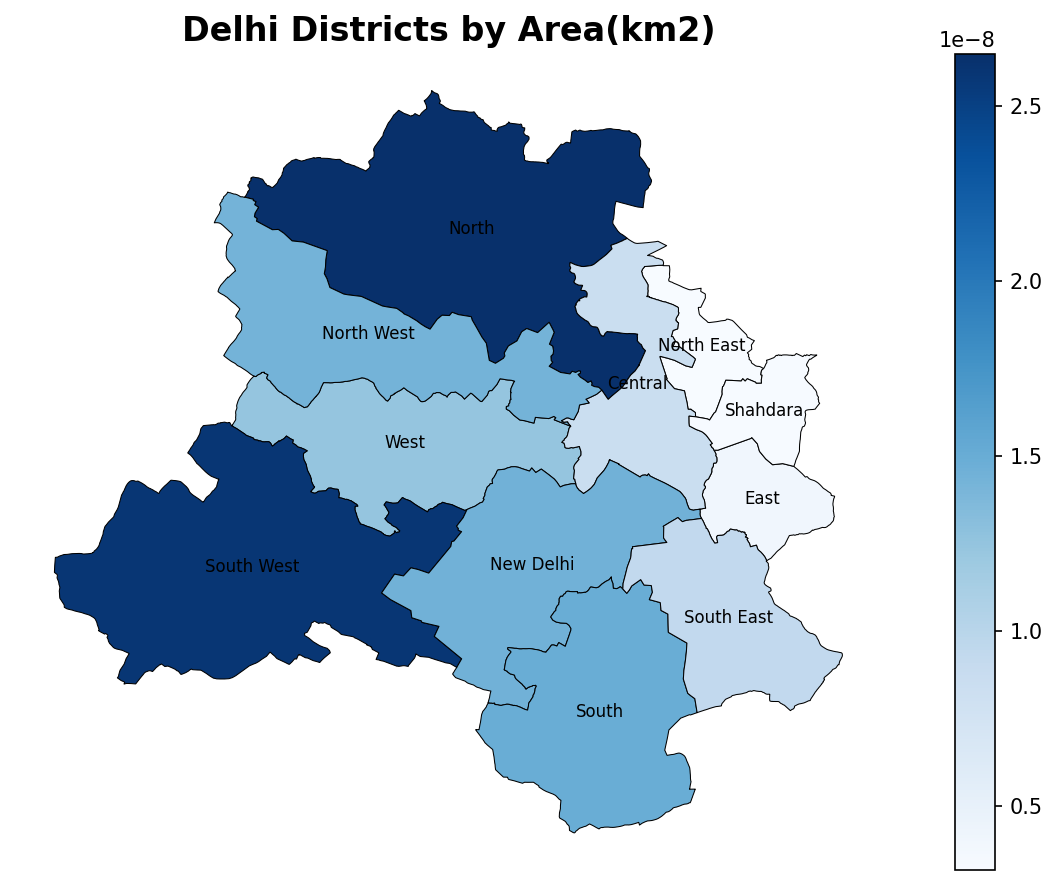

In [14]:
#set high resolution for better quality
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150
#create a choropleth map showing 
fig, ax =plt.subplots(figsize=(10,6))
gdf.plot(
    column="area_km2",
    ax =ax,
    legend='True',
    cmap="Blues",
    edgecolor="black",
    linewidth=0.5
)
# Add labels for each district
for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf["dtname"]):
    ax.text(
        x, y, label,
        fontsize=8,
        ha="center",
        va="center"
    )

plt.title("Delhi Districts by Area(km2)",fontsize =16,fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.savefig("south_west_distance_map.png", bbox_inches="tight")
plt.show()

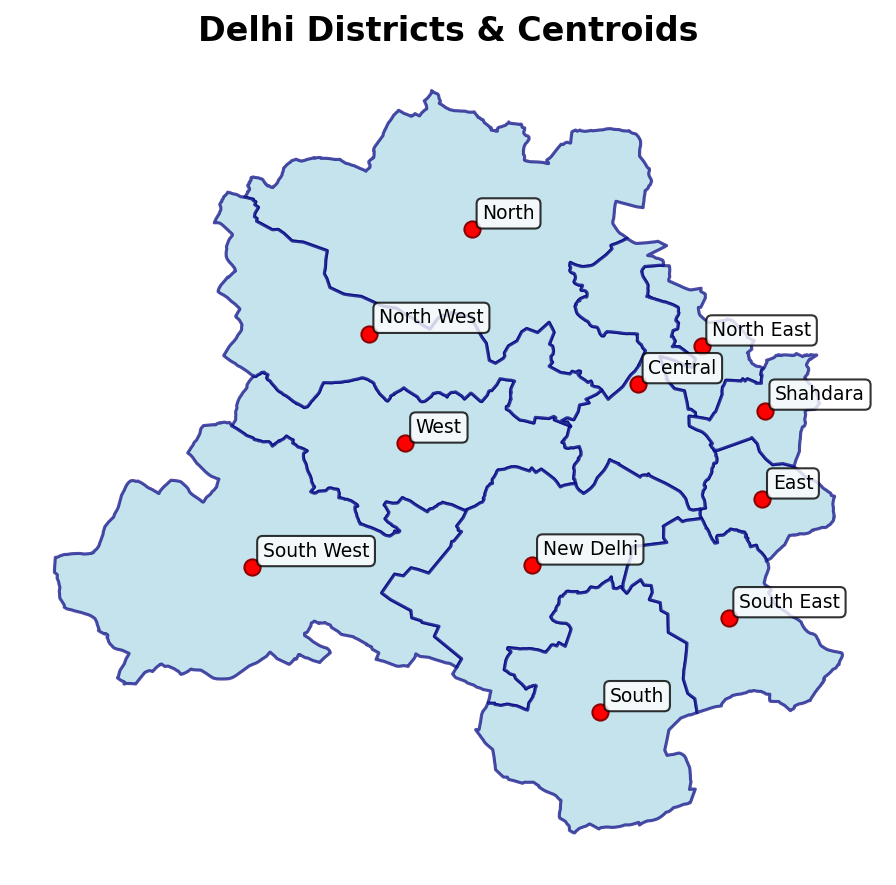

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# ---- BASE MAP: District boundaries ----
gdf.plot(
    ax=ax,
    color="lightblue",
    edgecolor="navy",
    linewidth=1.5,
    alpha=0.7
)

# ---- CENTROIDS ----
gdf["centroid"] = gdf.geometry.centroid   # make sure it exists

gdf.set_geometry("centroid").plot(
    ax=ax,
    color="red",
    markersize=60,
    edgecolor="darkred"
)

# ---- LABELS ----
for idx, row in gdf.iterrows():
    ax.annotate(
        row["dtname"],
        (row.centroid.x, row.centroid.y),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3",
                  facecolor="white",
                  alpha=0.8),
    )

# ---- FINAL FORMATTING ----
ax.set_title("Delhi Districts & Centroids", fontsize=16, fontweight="bold")
ax.set_axis_off()

plt.tight_layout()
plt.savefig("Delhi Districts & Centroids",bbox_inches="tight")
plt.show()        # 👈 VERY IMPORTANT


In [33]:
# Restore original geometry as active geometry
gdf = gdf.set_geometry("geometry").copy()

# Make sure CRS is correct
gdf = gdf.set_crs("EPSG:4326", allow_override=True)
print(gdf.total_bounds)
gdf["centroid"] = gdf.geometry.centroid
# Compute map center from REAL geometry
minx, miny, maxx, maxy = gdf.total_bounds
center_lat = (miny + maxy) / 2
center_lon = (minx + maxx) / 2
# ---- HARD RESET OF CRS AND GEOMETRY ----
gdf = gdf.set_geometry("geometry").copy()
gdf = gdf.set_crs("EPSG:4326", allow_override=True)

# Reproject properly (this actually fixes the coordinates)
gdf = gdf.to_crs("EPSG:4326")

print(gdf.total_bounds)

# Folium map with basemap and zoom
m = gdf.explore(
    column="distance_to_South_West_km",
    cmap="YlOrRd",
    tooltip=["dtname", "distance_to_South_West_km"],
    popup=True,
    legend=True,
    location=[center_lat, center_lon],
    zoom_start=11,
    tiles="OpenStreetMap"  # this is the basemap
)
# Add South West reference marker
sw = gdf[gdf["dtname"] == "South West"].centroid.iloc[0]
folium.Marker(
    location=[sw.y, sw.x],
    popup="South West (Reference)",
    icon=folium.Icon(color="red", icon="info-sign")
).add_to(m)

m

[76.83894496 28.40469199 77.34755864 28.88380723]
[76.83894496 28.40469199 77.34755864 28.88380723]


C:\Users\AKHTAR HUSSAIN\AppData\Local\Temp\ipykernel_29664\575966989.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid
C:\Users\AKHTAR HUSSAIN\AppData\Local\Temp\ipykernel_29664\575966989.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sw = gdf[gdf["dtname"] == "South West"].centroid.iloc[0]
